In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os
import cv2
import keras
from keras import layers

In [2]:
artists = pd.read_csv('../raw_data/artists.csv')
artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [3]:
#make id new index and drop id
artists.index = artists['id']
artists.drop(labels='id', axis=1, inplace = True)
#rename 'Albrecht Dürer' to 'Albrecht Durer'
artists['name'] = artists['name'].replace(to_replace='Albrecht D.rer', value = 'Albrecht Durer', regex = True)
artists.head()

,name,years,genre,nationality,bio,wikipedia,paintings
id,,,,,,,
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [4]:
#extract the artist name and genre
movement = artists.loc[:,['name', 'genre']]
movement.head(10)

,name,genre
id,,
0,Amedeo Modigliani,Expressionism
1,Vasiliy Kandinskiy,"Expressionism,Abstractionism"
2,Diego Rivera,"Social Realism,Muralism"
3,Claude Monet,Impressionism
4,Rene Magritte,"Surrealism,Impressionism"
5,Salvador Dali,Surrealism
6,Edouard Manet,"Realism,Impressionism"
7,Andrei Rublev,Byzantine Art
8,Vincent van Gogh,Post-Impressionism


In [5]:
#determine proportion of paintings per artist
artistname = []
percent = []

for i in artists.index:
    total = artists.loc[:,'paintings'].sum()
    perc = artists.loc[i, 'paintings']/total * 100
    name = artists.loc[i, 'name']
    artistname.append(name)
    percent.append(perc)
    
zipped = zip(['name', '% of paintings'], [artistname, percent])
zipped_list = list(zipped)
painting_dict = dict(zipped_list)
painting_perc = pd.DataFrame(painting_dict)
painting_perc.head(10)

,name,% of paintings
0,Amedeo Modigliani,2.285105
1,Vasiliy Kandinskiy,1.041913
2,Diego Rivera,0.828795
3,Claude Monet,0.864314
4,Rene Magritte,2.296945
5,Salvador Dali,1.645749
6,Edouard Manet,1.065593
7,Andrei Rublev,1.172152
8,Vincent van Gogh,10.383614
9,Gustav Klimt,1.385271


In [6]:
#create data frame with artist name, genre, filename, filepath

def get_class_folder(folder):
    ''' this function returns
        a list of all class folder names
        param: folder
        return: folder_list '''
    folder_list = []
    for f in os.listdir(folder):
        folder_list.append(f)
    return folder_list


def get_filepath(directory):
    ''' this function creates a filepath
        and returns labels, filename, and filepath
        param: directory
        return: list of labels, image_path, image_filename '''
     
    partialpath = []
    classfolders = get_class_folder(directory)
    
    for folder in classfolders:
        path = os.path.join(directory,folder)
        if path is not None:
            partialpath.append(path)
    
    labels = []
    image_path = []
    image_filename = []
    
    i=0
    
    for path in partialpath:
        for filename in os.listdir(path):
            img = os.path.join(path,filename)
            if img is not None:
                image_path.append(img)
                image_filename.append(filename)
                labels.append(classfolders[i])
        i+=1
    
    labels = clean_labels(labels, directory)
    
    return [labels, image_path, image_filename]
    
def clean_labels(labels, directory):
    ''' this function cleans labels
        by removing the directory information
        param: labels, directory
        return: cleaned list '''
    cleaned=[]
    for i in labels:
        cleaned.append(i.strip(directory))
    return cleaned
    
#provide location of images
image_path = '..\images'
#get folder names
folders = get_class_folder(image_path)
#get image information
labels, path, filename = get_filepath(image_path)
#conver lists to dataframe
zipped = zip(['name', 'filename', 'filepath'], [labels, filename, path])
zipped_list = list(zipped)
dict_list = dict(zipped_list)
artlabels = pd.DataFrame(dict_list)

In [7]:
#clean names column
artlabels['name'] = artlabels['name'].str.replace('_', ' ')
#merge genre with artlabels
artlabels = artlabels.merge(movement, how='left', on='name')
artlabels

,name,filename,filepath,genre
0,Albrecht Durer,Albrecht_Durer_1.jpg,..\images\Albrecht_Durer\Albrecht_Durer_1.jpg,Northern Renaissance
1,Albrecht Durer,Albrecht_Durer_10.jpg,..\images\Albrecht_Durer\Albrecht_Durer_10.jpg,Northern Renaissance
2,Albrecht Durer,Albrecht_Durer_100.jpg,..\images\Albrecht_Durer\Albrecht_Durer_100.jpg,Northern Renaissance
3,Albrecht Durer,Albrecht_Durer_101.jpg,..\images\Albrecht_Durer\Albrecht_Durer_101.jpg,Northern Renaissance
4,Albrecht Durer,Albrecht_Durer_102.jpg,..\images\Albrecht_Durer\Albrecht_Durer_102.jpg,Northern Renaissance
...,...,...,...,...
8441,William Turner,William_Turner_65.jpg,..\images\William_Turner\William_Turner_65.jpg,Romanticism
8442,William Turner,William_Turner_66.jpg,..\images\William_Turner\William_Turner_66.jpg,Romanticism
8443,William Turner,William_Turner_7.jpg,..\images\William_Turner\William_Turner_7.jpg,Romanticism
8444,William Turner,William_Turner_8.jpg,..\images\William_Turner\William_Turner_8.jpg,Romanticism


In [8]:
#generate a dataset
image_size = (256, 256)
batch_size = 12

train_ds = keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="training",
    seed=15,
    image_size= image_size,
    batch_size= batch_size,
)
val_ds = keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="validation",
    seed=15,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8446 files belonging to 50 classes.
Using 6757 files for training.
Found 8446 files belonging to 50 classes.
Using 1689 files for validation.


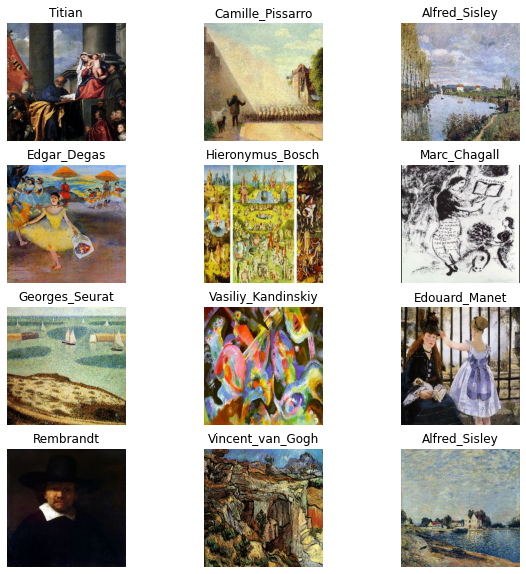

In [9]:
#visualize data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [10]:
#data augmentation using four layers
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomCrop(height=200, width=200),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomWidth(factor=0.2),
    ])


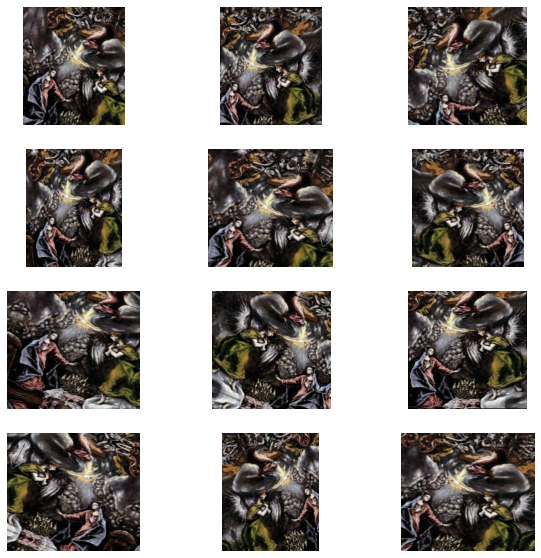

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [12]:
#create duplicates of names to have singular genres
artist_style = artists.loc[:,['name', 'genre']] 
commas = artist_style[artist_style['genre'].str.contains(',')]
split_movement= pd.concat([commas[['name']], commas['genre'].str.split(',', expand=True)], axis=1)
melt_movement= split_movement.melt(id_vars='name', value_vars=[0,1,2], var_name='count', value_name='movement')
single_movement= melt_movement.drop(labels='count', axis=1).dropna(how='any')

#provide start and end date of movements
#melt data set into new csv with labels of images and classes
#merge clean_movement with artists
#artists_copy.merge(clean_movement,how='left', left_on='Column1', right_on='ColumnA')

In [13]:
from keras.preprocessing.image import ImageDataGenerator
layers = [ ImageDataGenerator(width_shift_range=[-100,100]),
      ImageDataGenerator(vertical_flip=True),
      ImageDataGenerator(brightness_range=[0.2,1.0]),
      ImageDataGenerator(rotation_range=0.2), ]

constraints: artists tend to blend different styles together and there really is no start/end date for art movements, only approximations